In [30]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

data = pd.read_csv('/content/AirPassengers.csv')

print(data.shape)
data.head()



(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
# convert the month column from text to datatime

data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [32]:
# set the month column as the index of the pandas dataframe

data.set_index('Month',inplace=True)

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

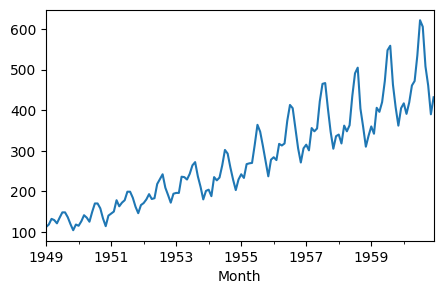

In [33]:
import matplotlib.pyplot as plt
# visualise the data
data['#Passengers'].plot(figsize=(5,3))

Text(0.5, 1.0, 'Residual')

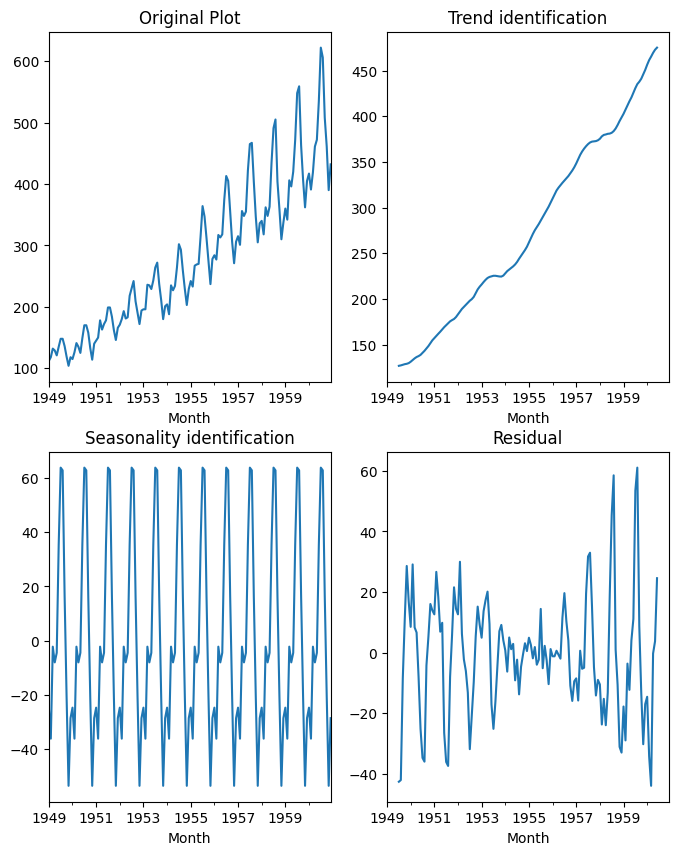

In [34]:
tempData = data['#Passengers']
OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData)
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')


In [35]:
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.331718
Freq: MS, dtype: float64


In [36]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

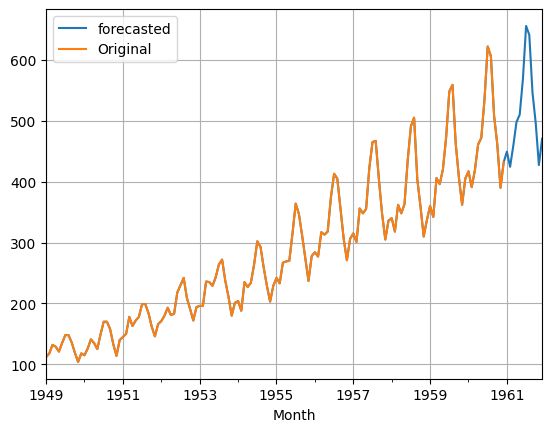

In [37]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')